In [39]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

load_dotenv()

AVES_ROOT = Path("data/external/hito")
AVES_ROOT

PosixPath('data/external/hito')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd

from aves.data import eod
from aves.features.utils import normalize_rows, normalize_columns
from aves.config import setup_style

setup_style()
os.getcwd()


'/mnt/c/Users/nacho/OneDrive/Escritorio/supositorios/aves'

In [3]:

df_2021 = gpd.read_file(AVES_ROOT / "Evaluación_de_la_Red_de_Ciclovías_del_Gran_Santiago_según_el_Decreto_102.geojson" )
df_2021_sin = gpd.read_file( AVES_ROOT / "siniestros_bicicletas" / "geojson" / "Siniestros_con_participación_de_bicicletas,_RM_Chile,_2021..geojson")

In [45]:
df_2021_sin["Gravedad"] = (
    df_2021_sin["Fallecidos"] * 10 + 
     df_2021_sin["Graves"] * 5 + 
      df_2021_sin["Menos_Grav"] * 3 + 
       df_2021_sin["Leves"] * 2 +
        df_2021_sin["Ilesos"] 

)
df_2021_sin.head()

,FID,POINT_X,POINT_Y,REGION,COD_COMUN,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,...,Zona,Cód_Calle,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Siniestros,geometry,Gravedad
0,1,-70.661481,-33.527418,REGION METROPOLITANA,13109,LA CISTERNA,GRAN AVDA JOSE MIGUEL CARRERA,EL PARRON,0,"GRAN AVDA JOSE MIGUEL CARRERA & EL PARRON, LA ...",...,URBANA,131090158,0,0,0,1,1,1,POINT (-70.66148 -33.52742),3
1,2,-70.661464,-33.377013,REGION METROPOLITANA,13104,CONCHALI,GRAL GAMBINO,POMAIRE,0,"GRAL GAMBINO & POMAIRE, CONCHALI",...,URBANA,131040311,0,0,1,0,0,1,POINT (-70.66146 -33.37701),3
2,3,-70.661006,-33.489913,REGION METROPOLITANA,13130,SAN MIGUEL,SALESIANOS,JOSE JOAQUIN PRIETO VIAL,0,"SALESIANOS & JOSE JOAQUIN PRIETO VIAL, SAN MIGUEL",...,URBANA,131300248,0,0,0,1,1,1,POINT (-70.66101 -33.48991),3
3,4,-70.660809,-33.406061,REGION METROPOLITANA,13108,INDEPENDENCIA,INDEPENDENCIA,STA LAURA,0,"INDEPENDENCIA & STA LAURA, INDEPENDENCIA",...,URBANA,131080174,0,0,0,1,0,1,POINT (-70.66081 -33.40606),2
4,5,-70.660770,-33.446015,REGION METROPOLITANA,13101,SANTIAGO,MANUEL RODRIGUEZ,LIBER BERNARDO O'HIGGINS,0,"MANUEL RODRIGUEZ & LIBER BERNARDO O'HIGGINS, S...",...,URBANA,131010391,0,0,1,0,1,1,POINT (-70.66077 -33.44601),4


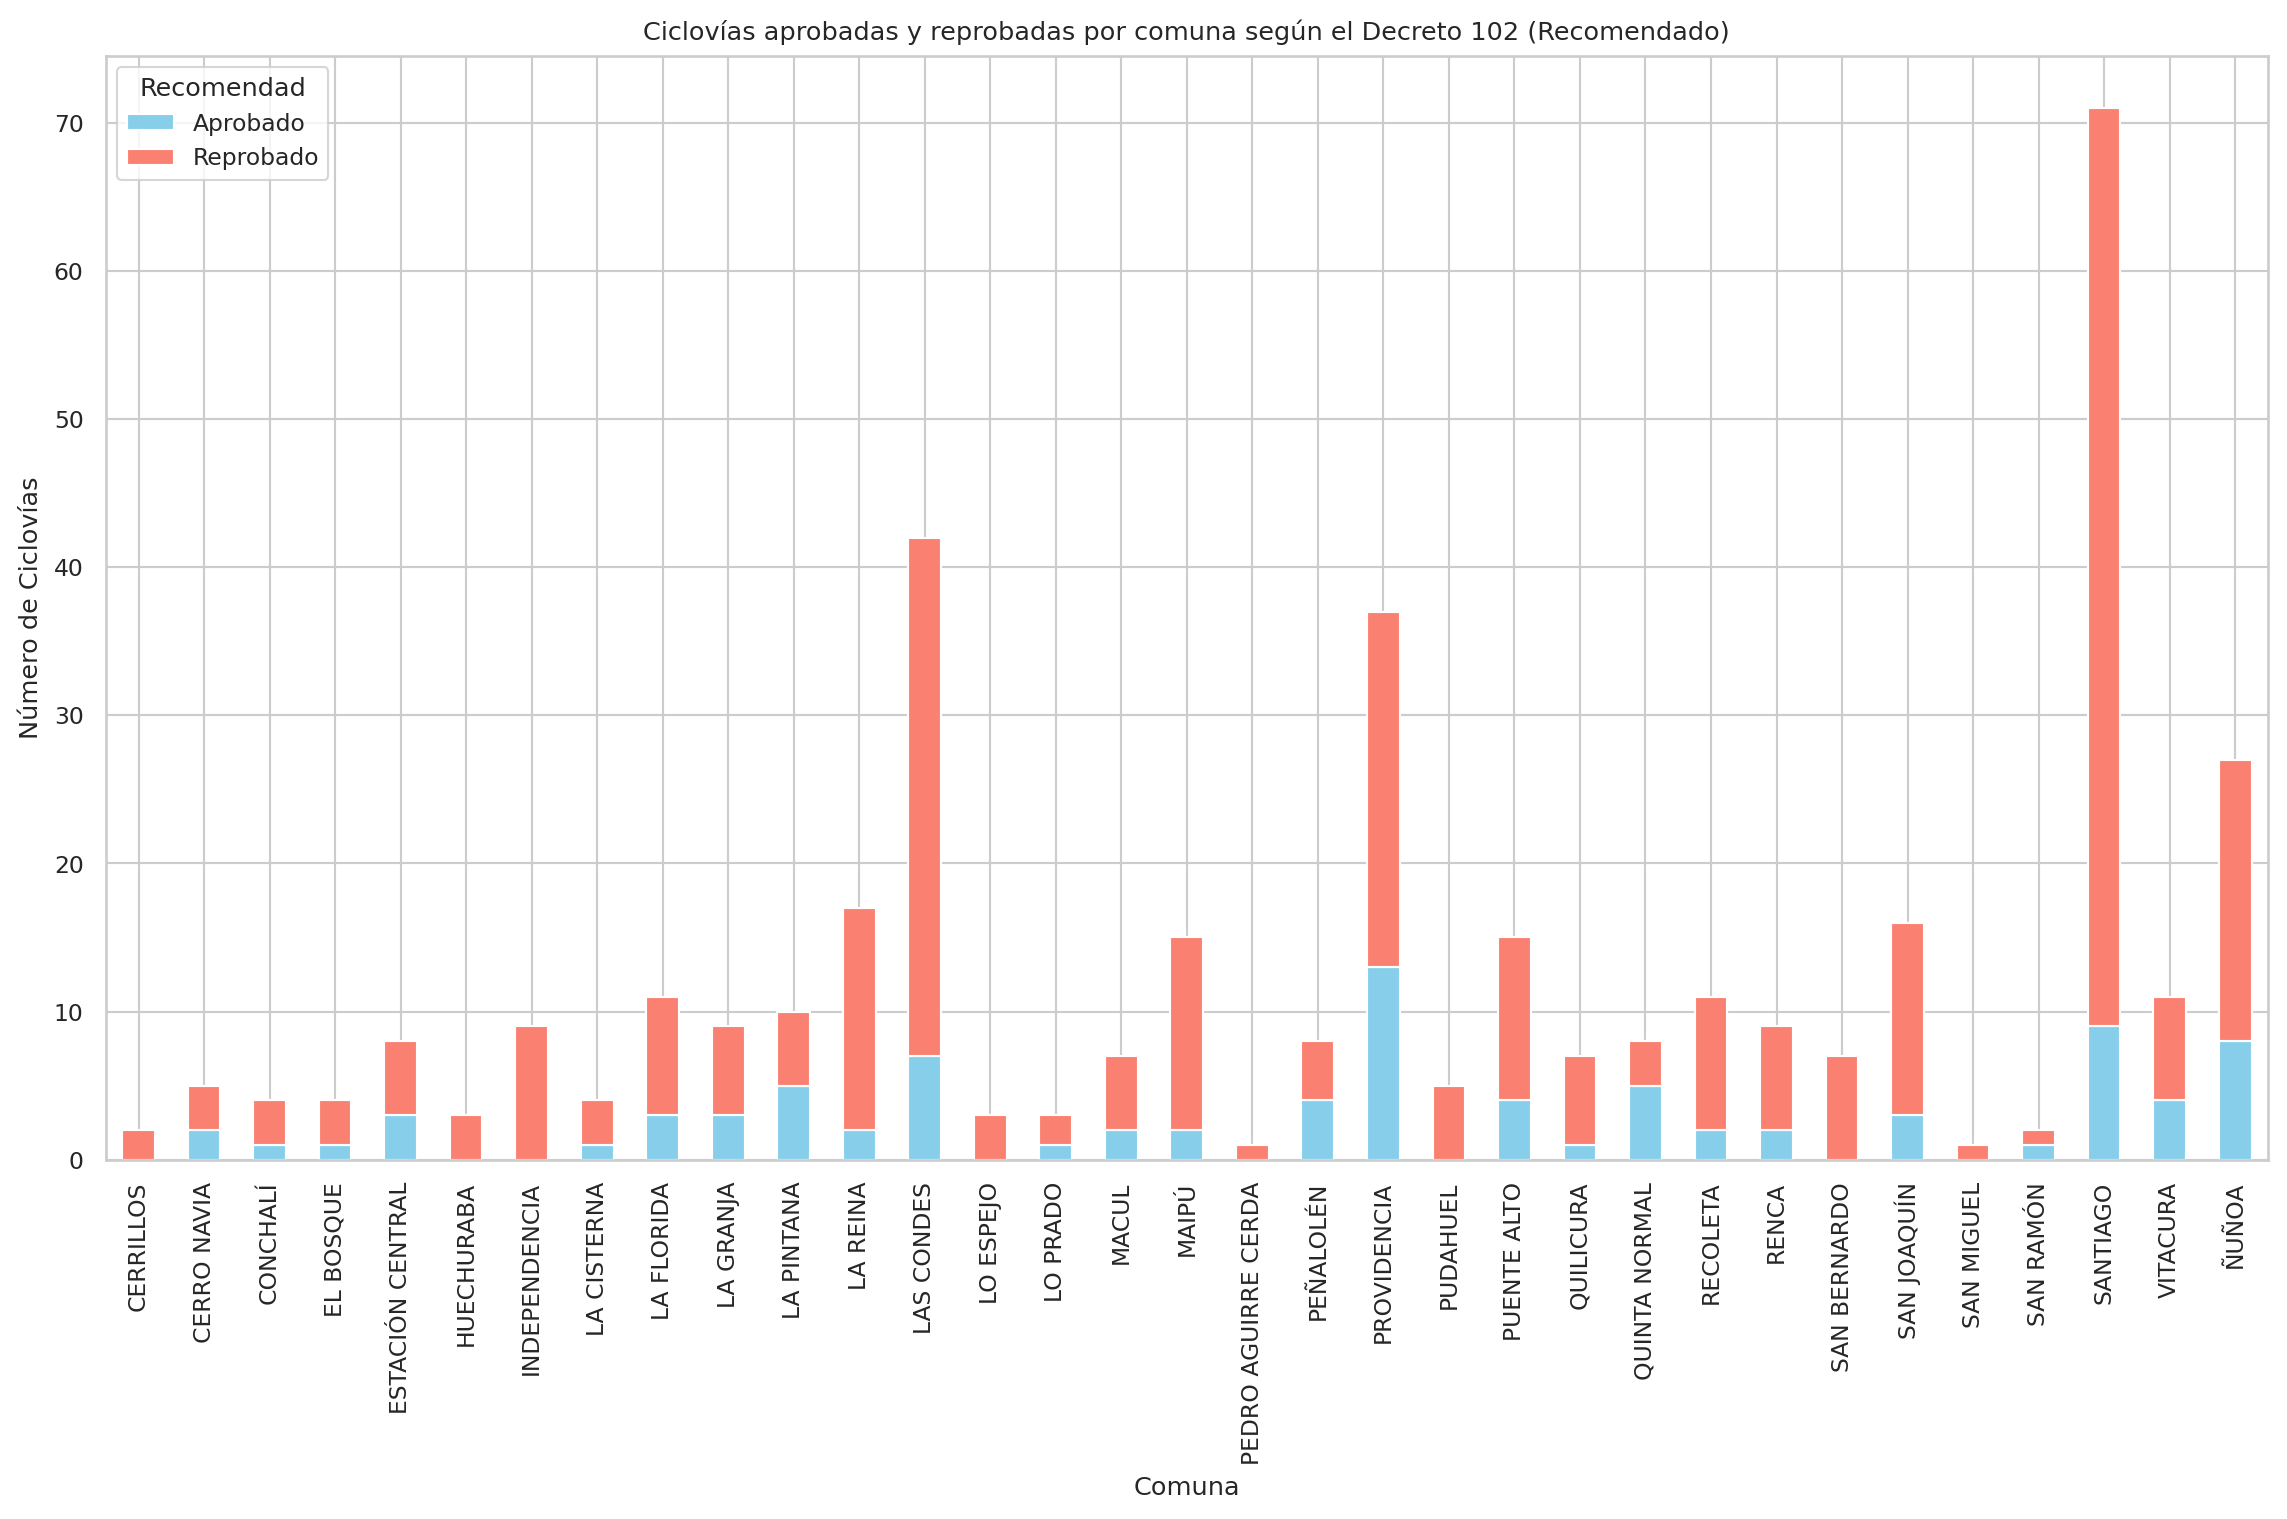

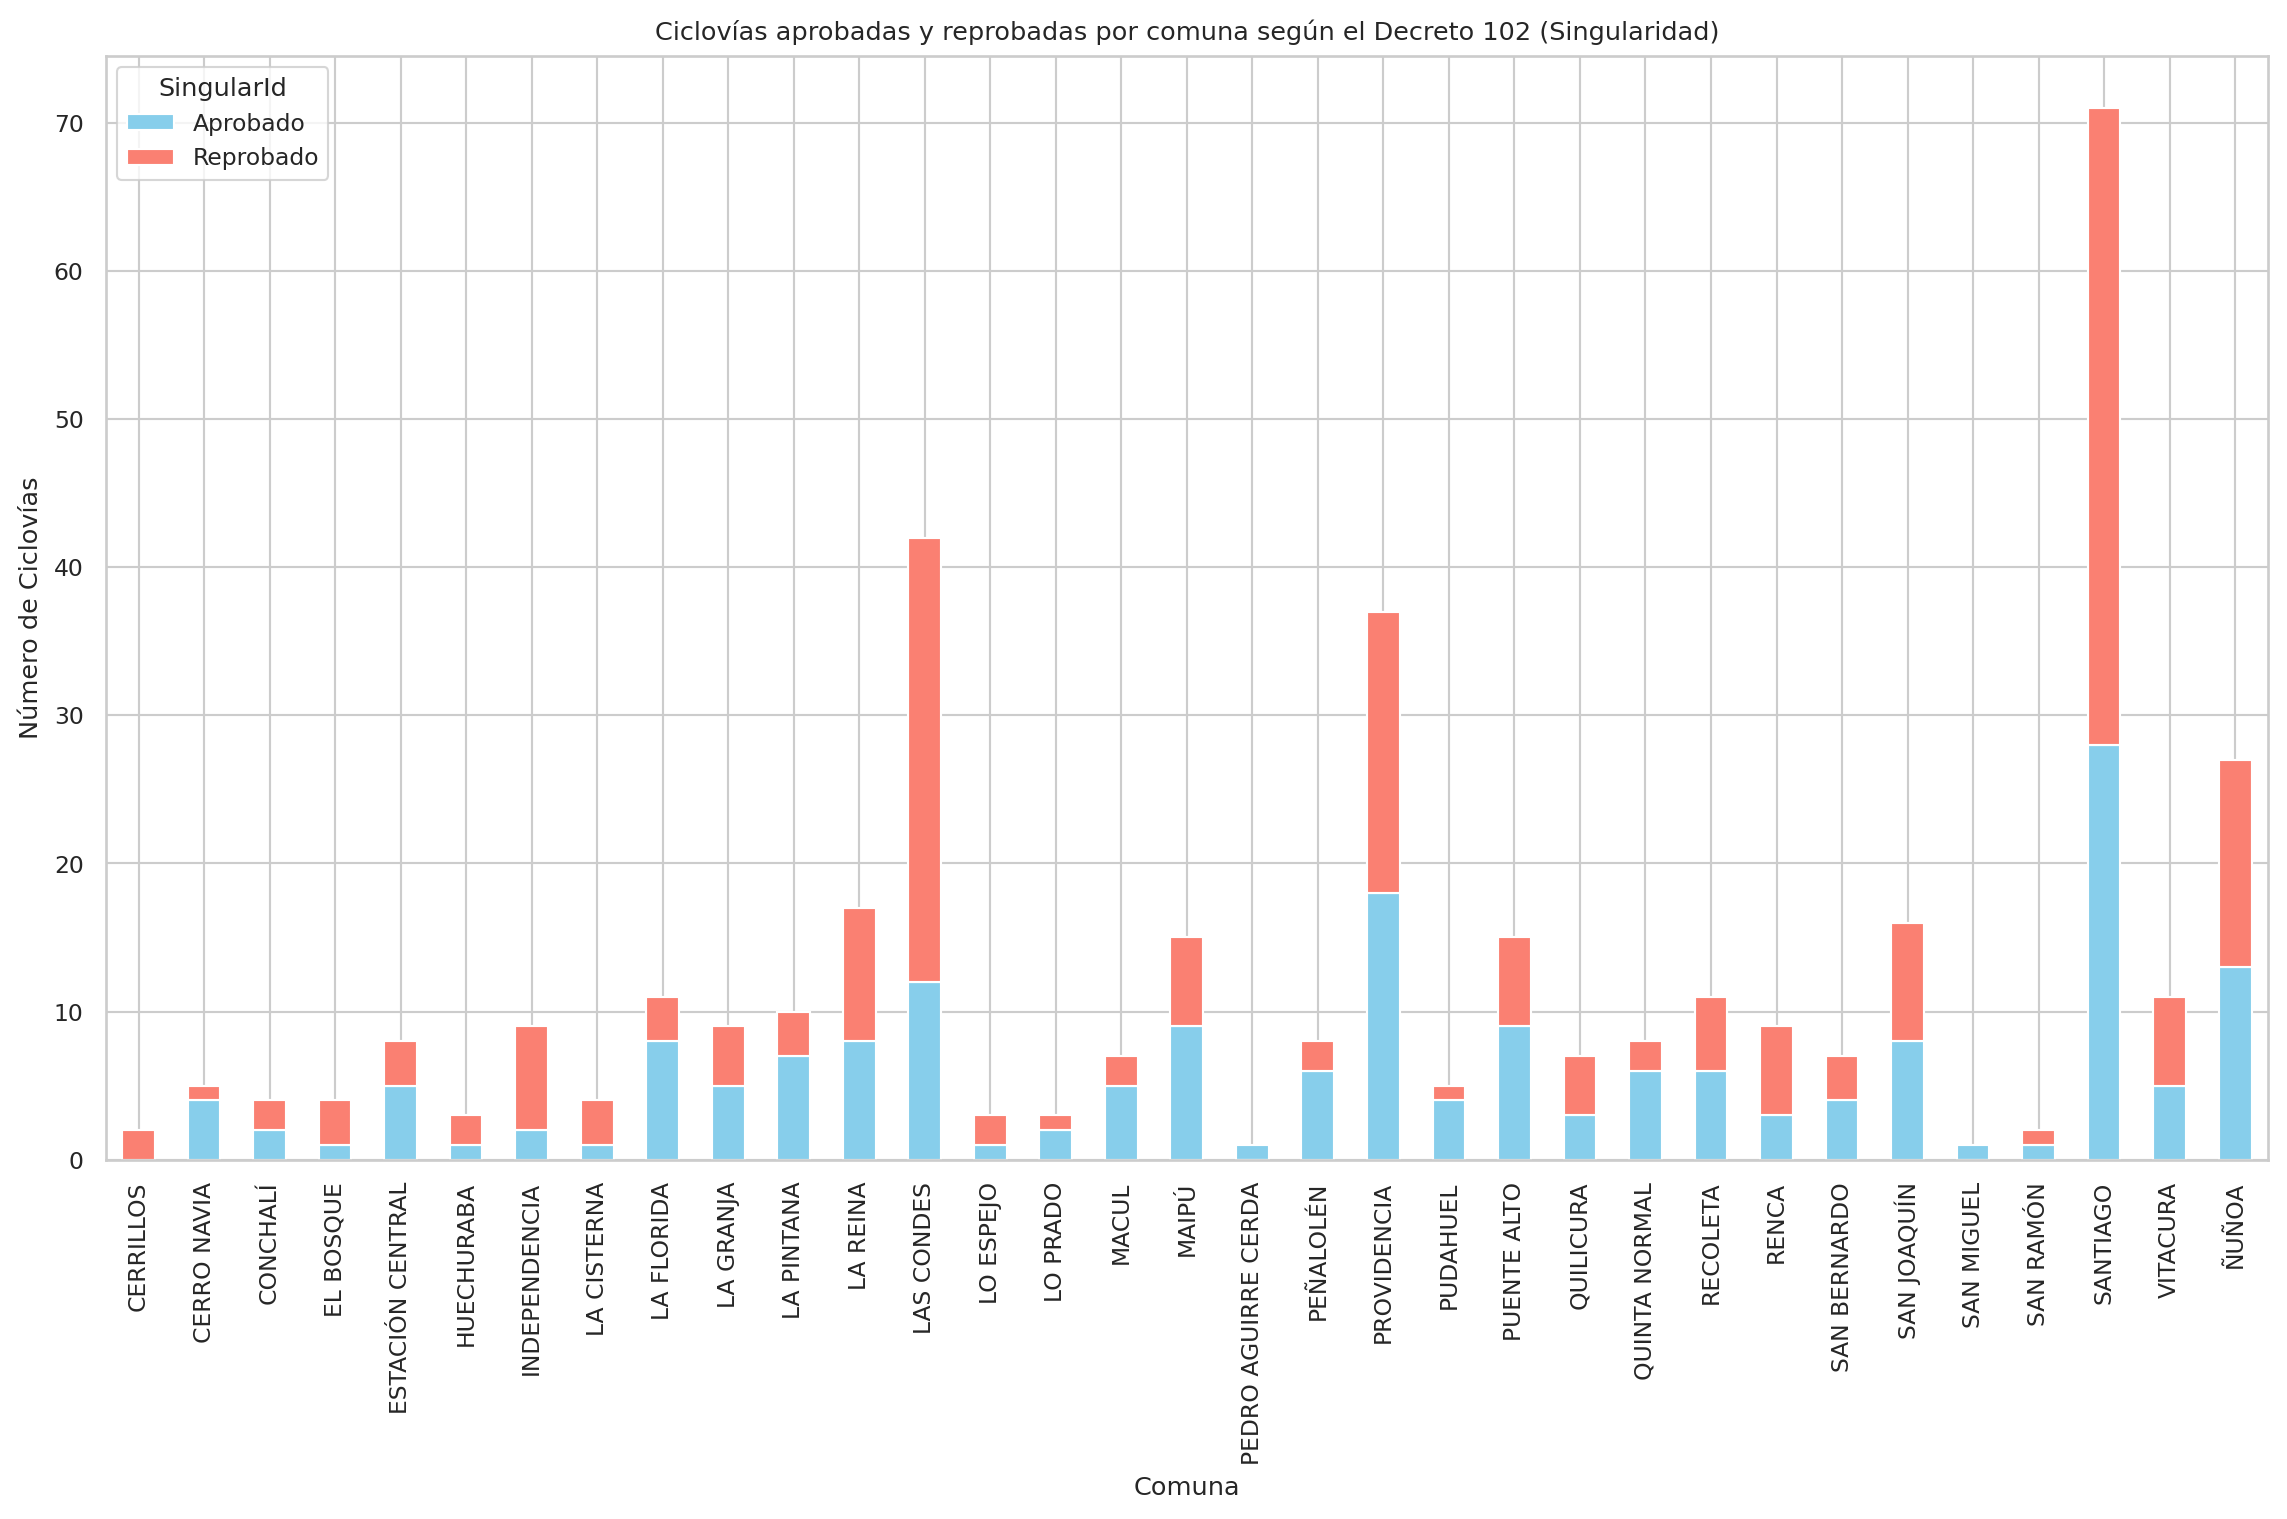

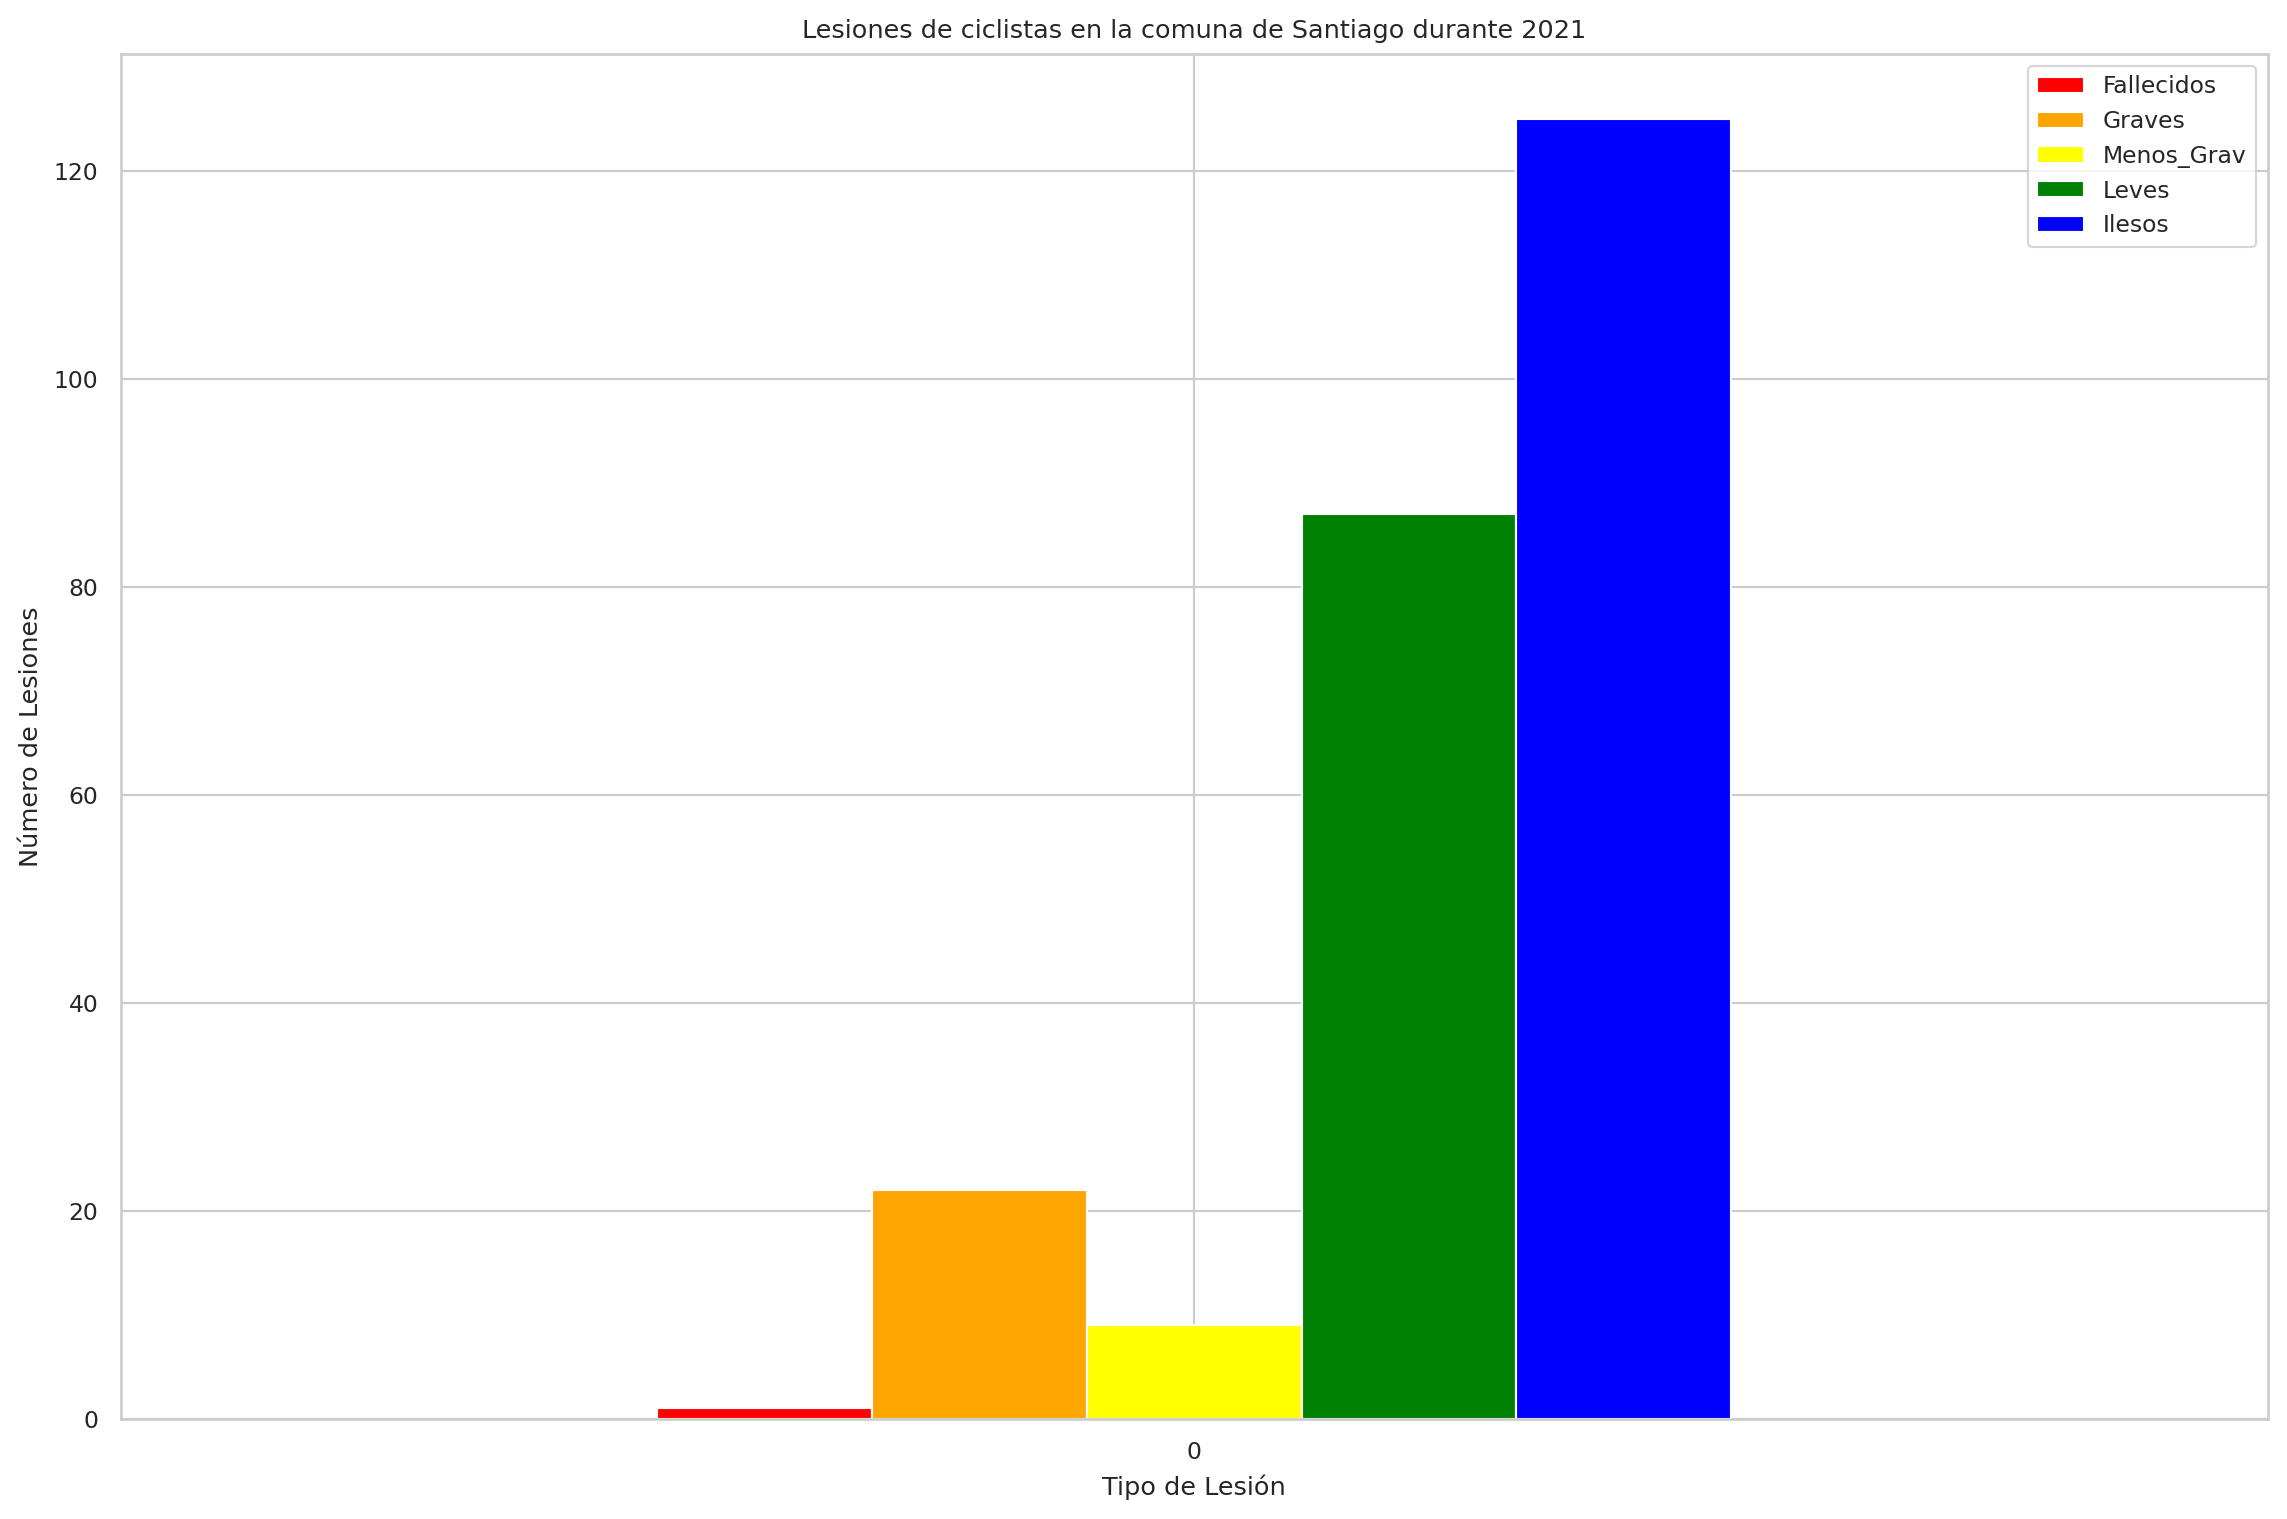

In [8]:




# Group by "COMUNA" and "Recomendad"
df_grouped = df_2021.groupby(['COMUNA', 'Recomendad']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))
df_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.xlabel('Comuna')
plt.ylabel('Número de Ciclovías')
plt.title('Ciclovías aprobadas y reprobadas por comuna según el Decreto 102 (Recomendado)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Recomendad', labels=['Aprobado', 'Reprobado'])
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Group by "COMUNA" and "SingularId"
df_grouped = df_2021.groupby(['COMUNA', 'Singularid']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 8))
df_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.xlabel('Comuna')
plt.ylabel('Número de Ciclovías')
plt.title('Ciclovías aprobadas y reprobadas por comuna según el Decreto 102 (Singularidad)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='SingularId', labels=['Aprobado', 'Reprobado'])
plt.tight_layout()  # Adjust layout to fit labels
plt.show()




# Filter all rows in "COMUNA" "SANTIAGO"
df_filtered = df_2021_sin[df_2021_sin['COMUNA'] == 'SANTIAGO']

# Count the number of row "Fallecidos" in all rows
total_deaths = df_filtered['Fallecidos'].sum()
# Count the number of row "Graves" in all rows
total_serious_injuries = df_filtered['Graves'].sum()
# Count the number of row "Menos_Grav" in all rows
total_minor_injuries = df_filtered['Menos_Grav'].sum()
# Count the number of row "Leves" in all rows
total_light_injuries = df_filtered['Leves'].sum()
# Count the number of row "Ilesos" in all rows
total_unharmed = df_filtered['Ilesos'].sum()

# Create a new DataFrame with the calculated values
df_summary = gpd.GeoDataFrame({
    'Fallecidos': [total_deaths],
    'Graves': [total_serious_injuries],
    'Menos_Grav': [total_minor_injuries],
    'Leves': [total_light_injuries],
    'Ilesos': [total_unharmed]
})

# Plot the data
plt.figure(figsize=(12, 8))
df_summary.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue'], ax=plt.gca())
plt.xlabel('Tipo de Lesión')
plt.ylabel('Número de Lesiones')
plt.title('Lesiones de ciclistas en la comuna de Santiago durante 2021')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Crear los puntos en donde esta la persona

In [38]:
df_2021.head()

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
df_2021_sin.head()

,FID,POINT_X,POINT_Y,REGION,COD_COMUN,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,...,Cód_Zona,Zona,Cód_Calle,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Siniestros,geometry
0,1,-70.661481,-33.527418,REGION METROPOLITANA,13109,LA CISTERNA,GRAN AVDA JOSE MIGUEL CARRERA,EL PARRON,0,"GRAN AVDA JOSE MIGUEL CARRERA & EL PARRON, LA ...",...,1,URBANA,131090158,0,0,0,1,1,1,POINT (-70.66148 -33.52742)
1,2,-70.661464,-33.377013,REGION METROPOLITANA,13104,CONCHALI,GRAL GAMBINO,POMAIRE,0,"GRAL GAMBINO & POMAIRE, CONCHALI",...,1,URBANA,131040311,0,0,1,0,0,1,POINT (-70.66146 -33.37701)
2,3,-70.661006,-33.489913,REGION METROPOLITANA,13130,SAN MIGUEL,SALESIANOS,JOSE JOAQUIN PRIETO VIAL,0,"SALESIANOS & JOSE JOAQUIN PRIETO VIAL, SAN MIGUEL",...,1,URBANA,131300248,0,0,0,1,1,1,POINT (-70.66101 -33.48991)
3,4,-70.660809,-33.406061,REGION METROPOLITANA,13108,INDEPENDENCIA,INDEPENDENCIA,STA LAURA,0,"INDEPENDENCIA & STA LAURA, INDEPENDENCIA",...,1,URBANA,131080174,0,0,0,1,0,1,POINT (-70.66081 -33.40606)
4,5,-70.660770,-33.446015,REGION METROPOLITANA,13101,SANTIAGO,MANUEL RODRIGUEZ,LIBER BERNARDO O'HIGGINS,0,"MANUEL RODRIGUEZ & LIBER BERNARDO O'HIGGINS, S...",...,1,URBANA,131010391,0,0,1,0,1,1,POINT (-70.66077 -33.44601)


In [47]:
from aves.features.geo import to_point_geodataframe
df_2021_sin.crs
origenes_viajes = to_point_geodataframe(
    df_2021_sin, "POINT_X", "POINT_Y", crs="epsg:4326"
)



<Axes: >

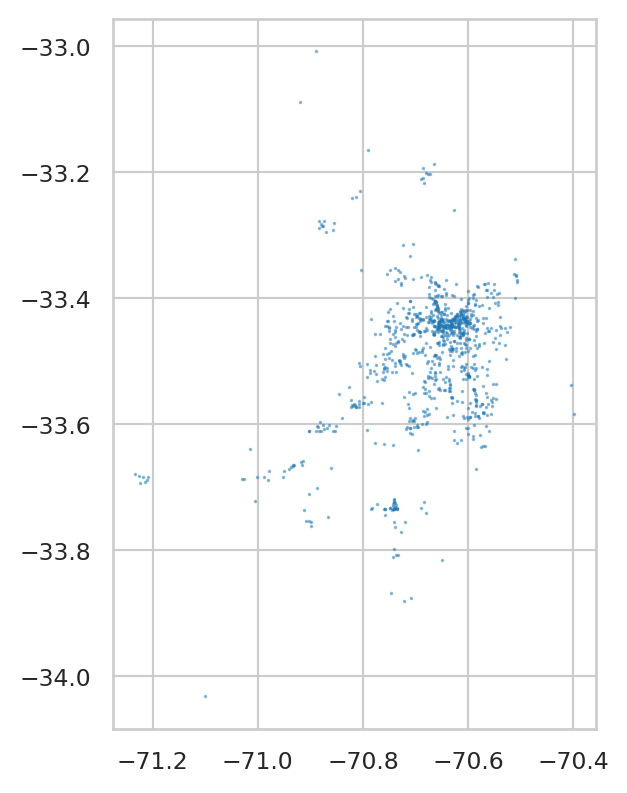

In [48]:
origenes_viajes.plot(markersize=1, marker='.', alpha=0.5)

In [49]:
origenes_viajes.columns

Index(['FID', 'POINT_X', 'POINT_Y', 'REGION', 'COD_COMUN', 'COMUNA',
       'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS', 'TIPO', 'Año',
       'Claseaccid', 'Cód_Regi', 'Cód_Zona', 'Zona', 'Cód_Calle', 'Fallecidos',
       'Graves', 'Menos_Grav', 'Leves', 'Ilesos', 'Siniestros', 'geometry',
       'Gravedad'],
      dtype='object')

In [50]:
zones = (
    gpd.read_file(Path("data") / "processed" / "scl_zonas_urbanas.json")
    .set_index("ID")
    .to_crs(origenes_viajes.crs)
)
zones.head()


,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
ID,,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((-70.65492 -33.55500, -70.65517 -33.5..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((-70.67599 -33.55542, -70.67452 -33.5..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((-70.67891 -33.55911, -70.68019 -33.5..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((-70.67625 -33.55513, -70.67653 -33.5..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((-70.66564 -33.55260, -70.66309 -33.5..."


<Axes: >

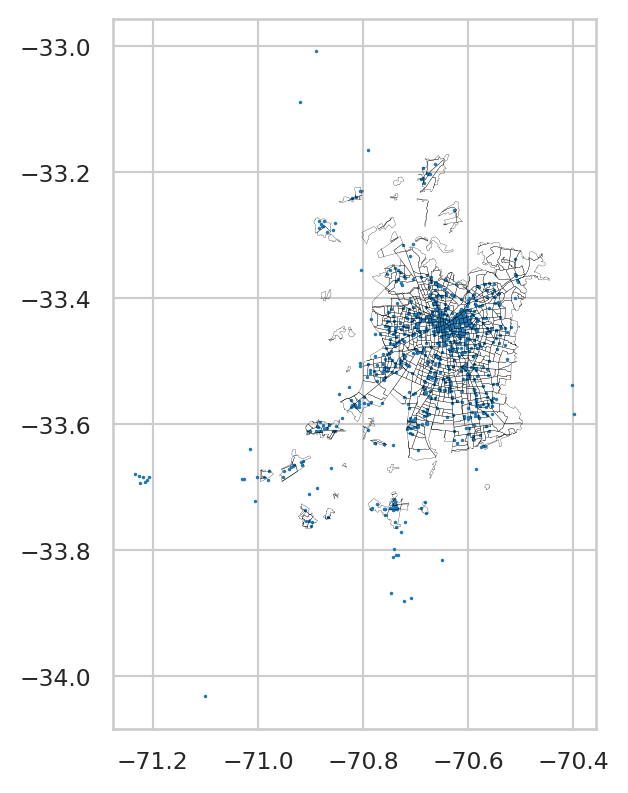

In [51]:
ax = origenes_viajes.plot(marker='.', markersize=1)
zones.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.1)

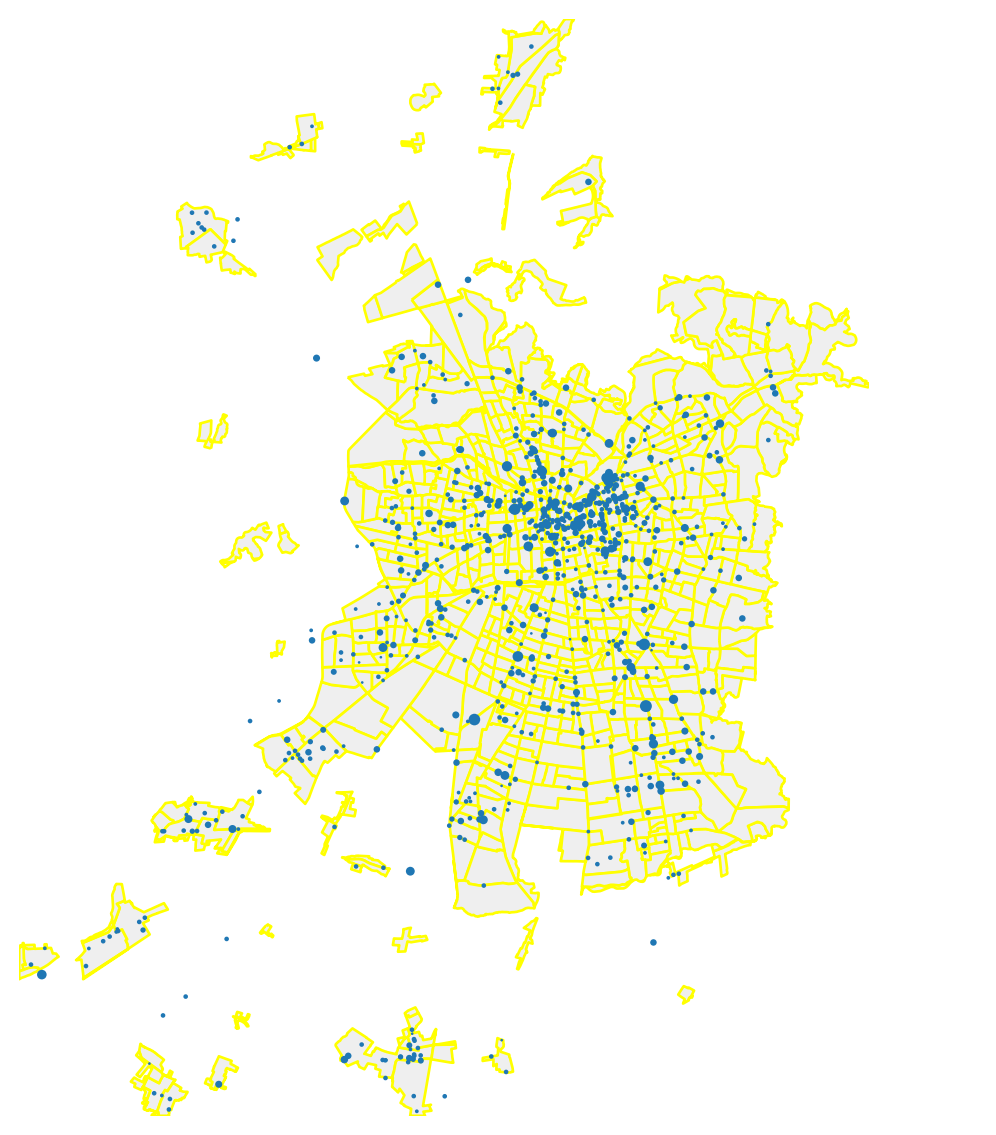

In [85]:
from aves.visualization.maps import bubble_map

grid = GeoFacetGrid(
    # los datos
    origenes_viajes,
    # el contexto geográfico. es opcional, se utiliza para configurar el gráfico
    context=zones,
    # la altura del gráfico
    height=6,
)

# visualizamos el contexto
grid.add_layer(zones, color="#efefef", edgecolor="yellow", linewidth=1)

# agregamos los bubble_map correspondientes
grid.add_layer(bubble_map, size="Gravedad", scale=1, edgecolor='none')

# agregamos la leyenda
grid.add_legend()

grid.fig.tight_layout()

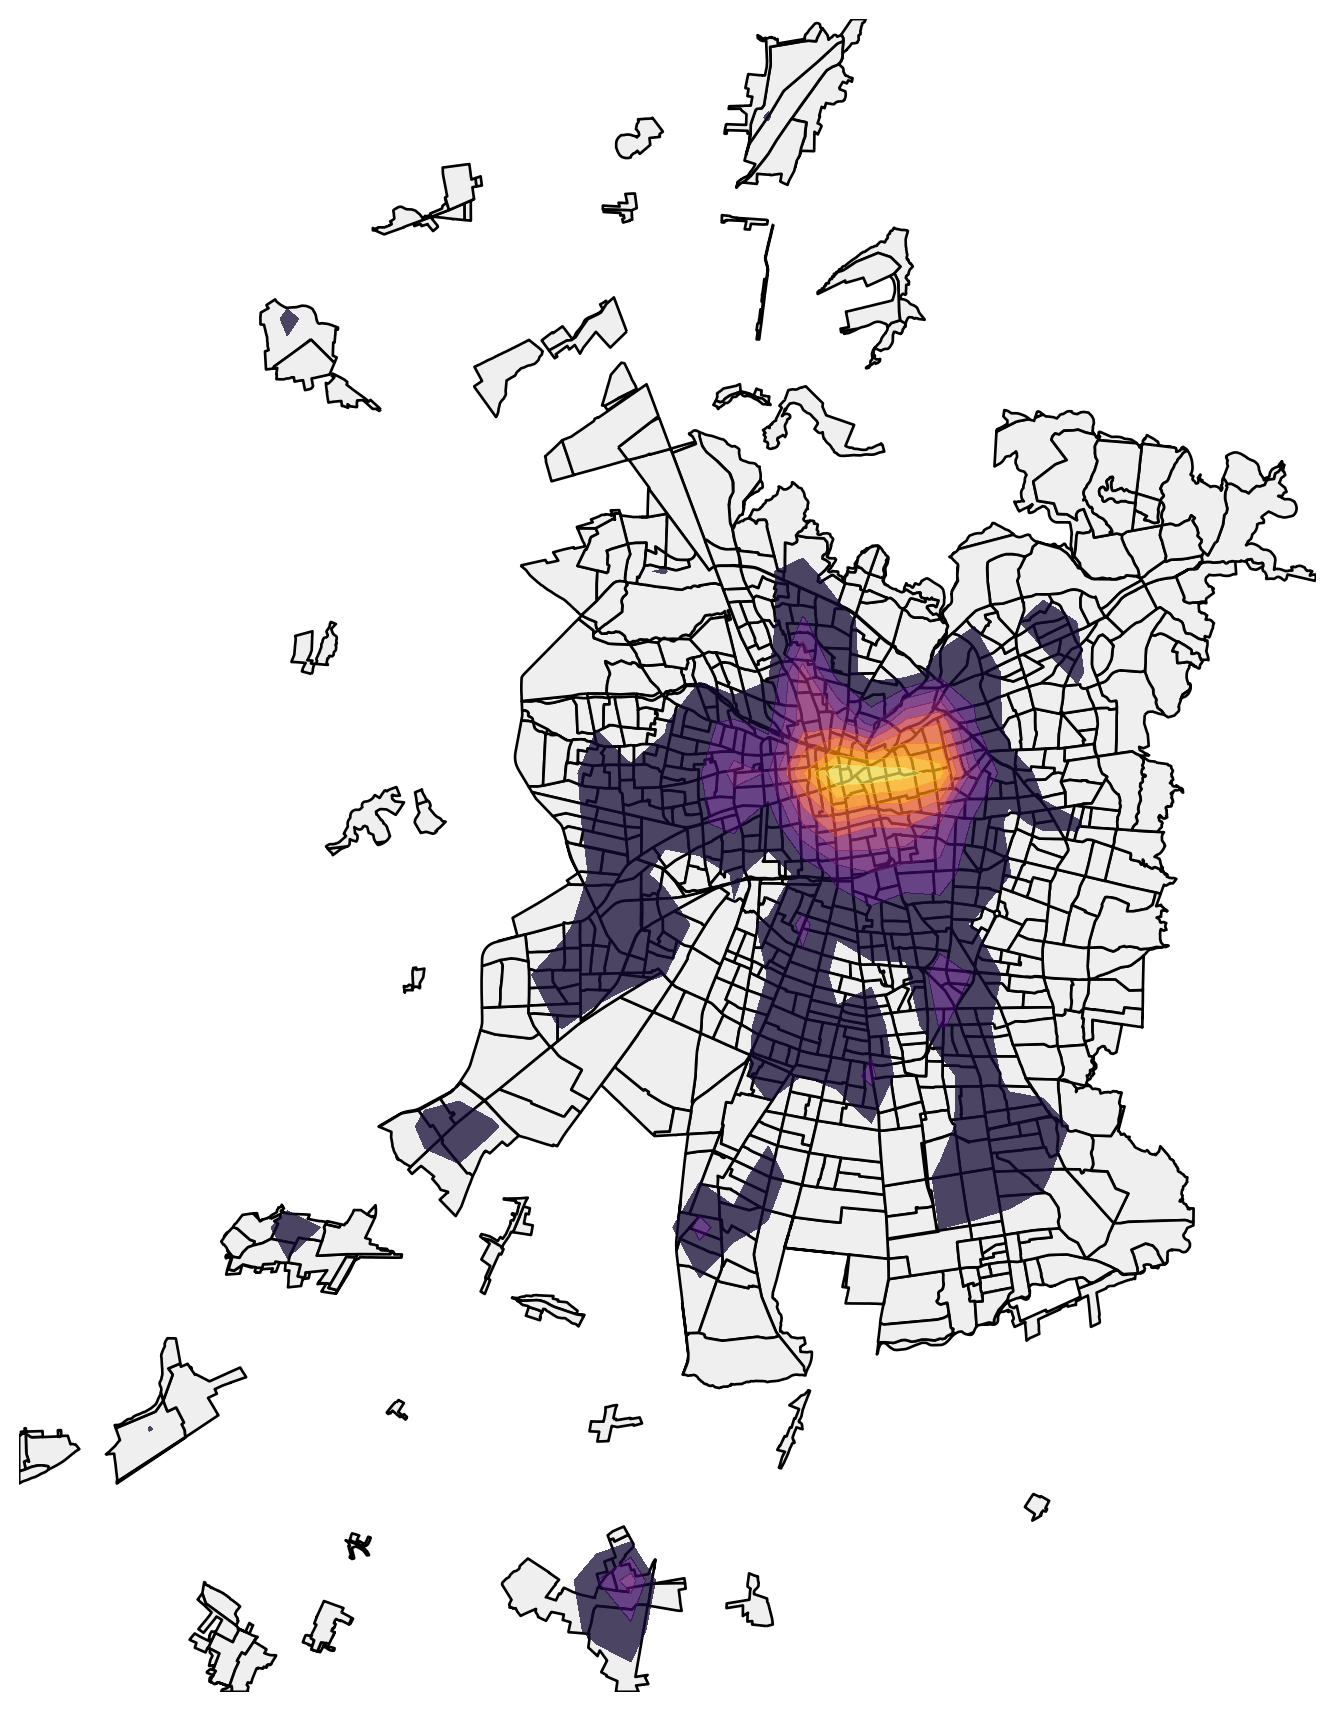

In [86]:
from aves.visualization.maps import heat_map
from aves.visualization.figures import GeoFacetGrid

grid = GeoFacetGrid(
    origenes_viajes,
    context=zones,
    height=9,
)

grid.add_layer(zones, color="#efefef", edgecolor="black", linewidth=1)

grid.add_layer(
    heat_map,
    # atributo de los datos con la importancia o peso de cada viaje
    # cantidad de niveles/colores del mapa de calor
    n_levels=10,
    # radio de influencia de cada viaje
    bandwidth=0.000000001,
    # valor de corte para los valores bajos del heatmap
    low_threshold=0.1,
    # transparencia
    alpha=0.75,
    # paleta de colores
    palette="inferno"
)


Se busca los puntos más específicos en donde ocurren los accidentes más graves

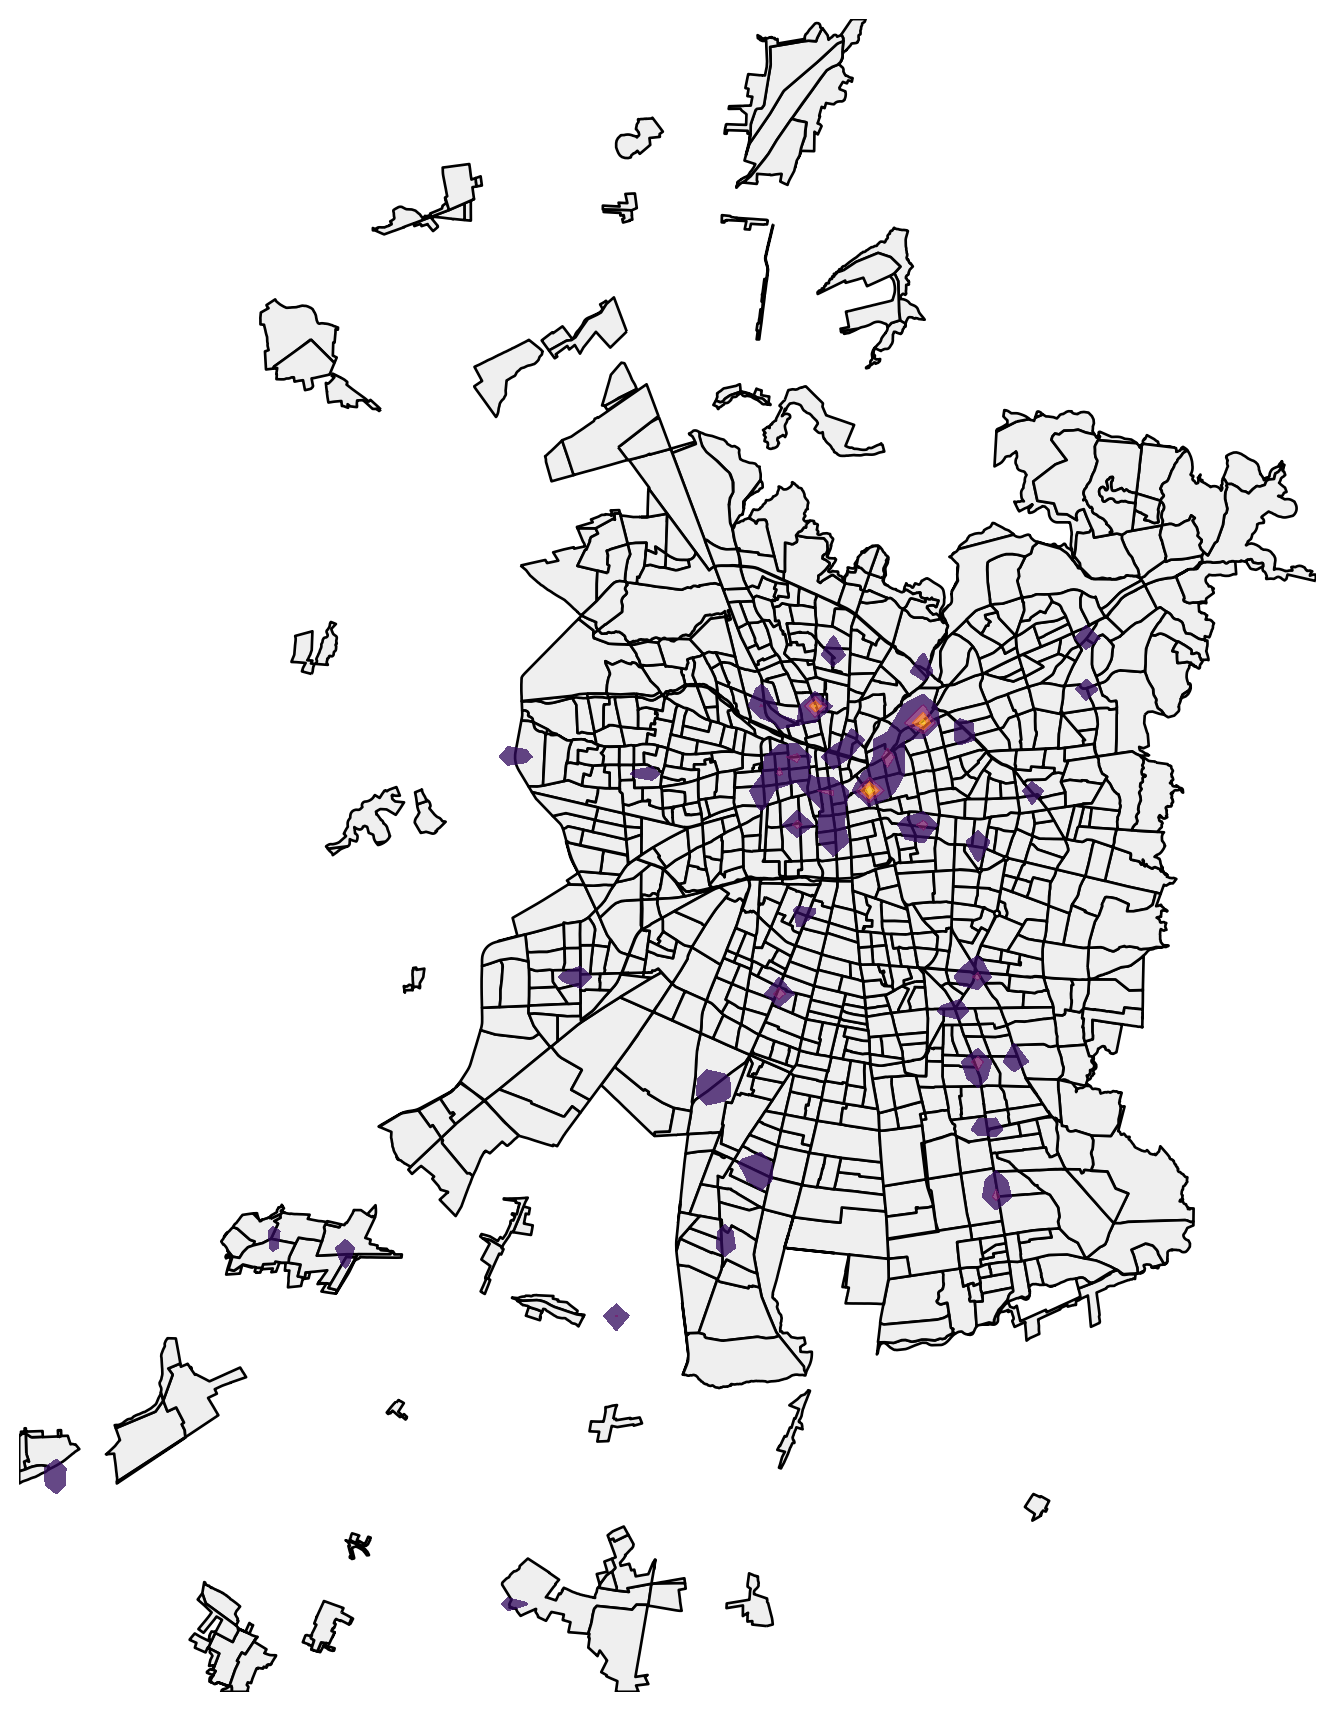

In [91]:
from aves.visualization.maps import heat_map
from aves.visualization.figures import GeoFacetGrid

grid = GeoFacetGrid(
    origenes_viajes[origenes_viajes.Gravedad > 7],
    context=zones,
    height=9,
)

grid.add_layer(zones, color="#efefef", edgecolor="black", linewidth=1)

grid.add_layer(
    heat_map,
    # atributo de los datos con la importancia o peso de cada viaje
    weight="Gravedad",
    # cantidad de niveles/colores del mapa de calor
    n_levels=5,
    # radio de influencia de cada viaje
    bandwidth=0.000000001,
    # valor de corte para los valores bajos del heatmap
    low_threshold=0.1,
    # transparencia
    alpha=0.75,
    # paleta de colores
    palette="inferno"
)